<a href="https://colab.research.google.com/github/josehenriqueroveda/Seed-Counter/blob/main/SeedCounter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Counting Seeds

It's recommended to put the seeds in a background that can provide a good contrast.
The count of the seeds occurs by adding up the number of pixels comprising the seeds and dividing by the average number of pixels per seed;

In [ ]:
# import the libs
from PIL import Image
import numpy as np
import pylab
import matplotlib.cm as cm

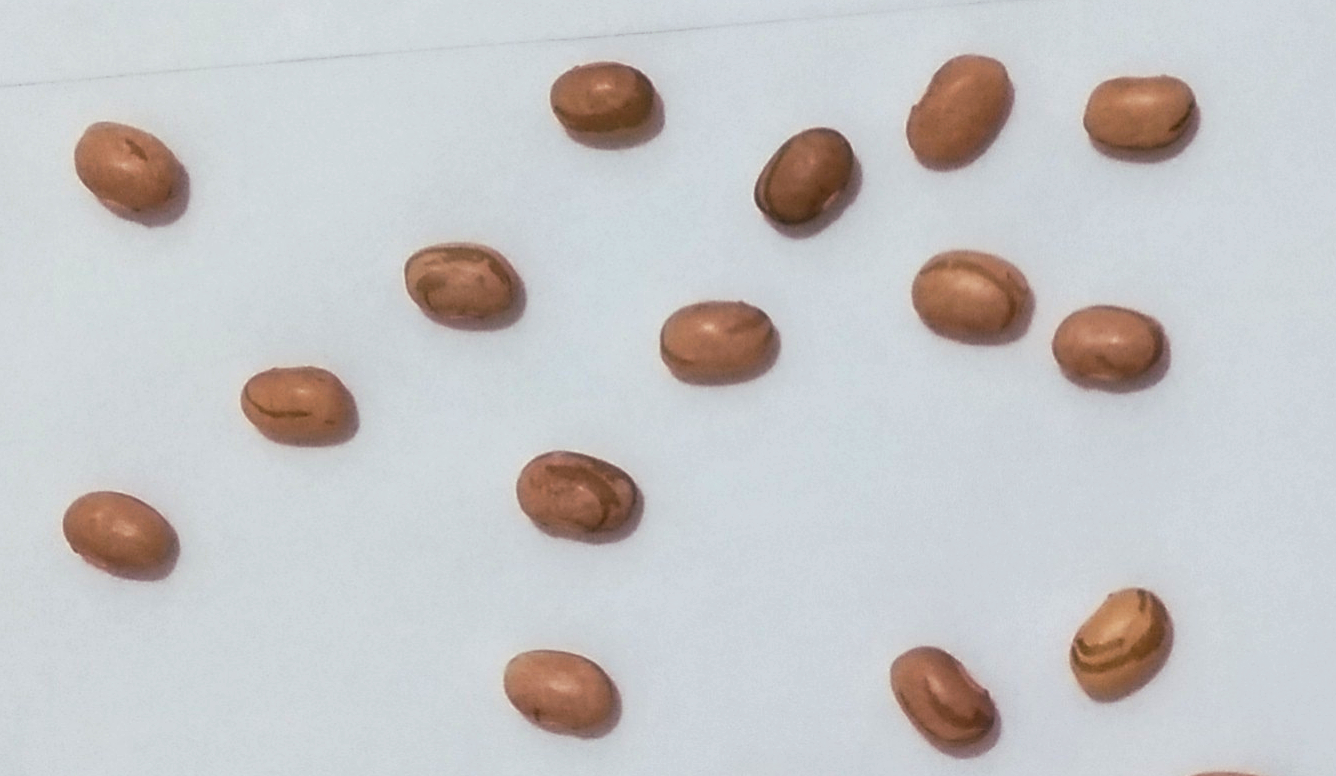

In [ ]:
# open the calib image - It's an region for calibration, where the seeds are well defined in relation to the background
calib_img = Image.open('/content/drive/MyDrive/ColabNotebooks/Projects/CountingSeeds/beans_15.jpg')
calib_img

In [ ]:
calib_array = np.array(calib_img)
calib_array.shape

(776, 1336, 3)

The first two dimensions of the array here are the height and width of the (unrotated) image in pixels. The final dimension holds the pixels' red, green and blue values. The seeds are kind of reddish, so will be used the values of the blue channel (index 2) which will be high for the white background and low for the seeds. Using pylab.

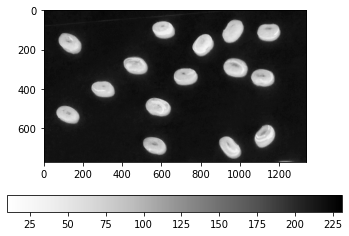

In [ ]:
pylab.imshow(calib_array[...,2], cmap=cm.Greys)
pylab.colorbar(orientation='horizontal')
pylab.show()

Which values to assign to the seeds and which to the background is a matter of judgement. This is one of the (few) cases that the default matplotlib "jet" colormap is useful:

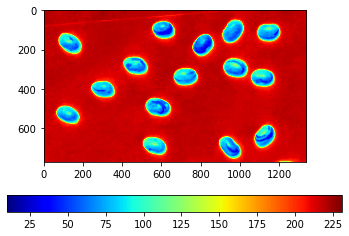

In [ ]:
pylab.imshow(calib_array[...,2])
pylab.colorbar(orientation='horizontal')
pylab.set_cmap('jet')
pylab.show()

130 seems to be a decent threshold value, so given there are 15 seeds in this calibration image, we can calculate the grain size in pixels:

In [ ]:
seed_size = np.sum(calib_array[...,2] < 130) / 15
seed_size

8217.266666666666

Testing the original image:

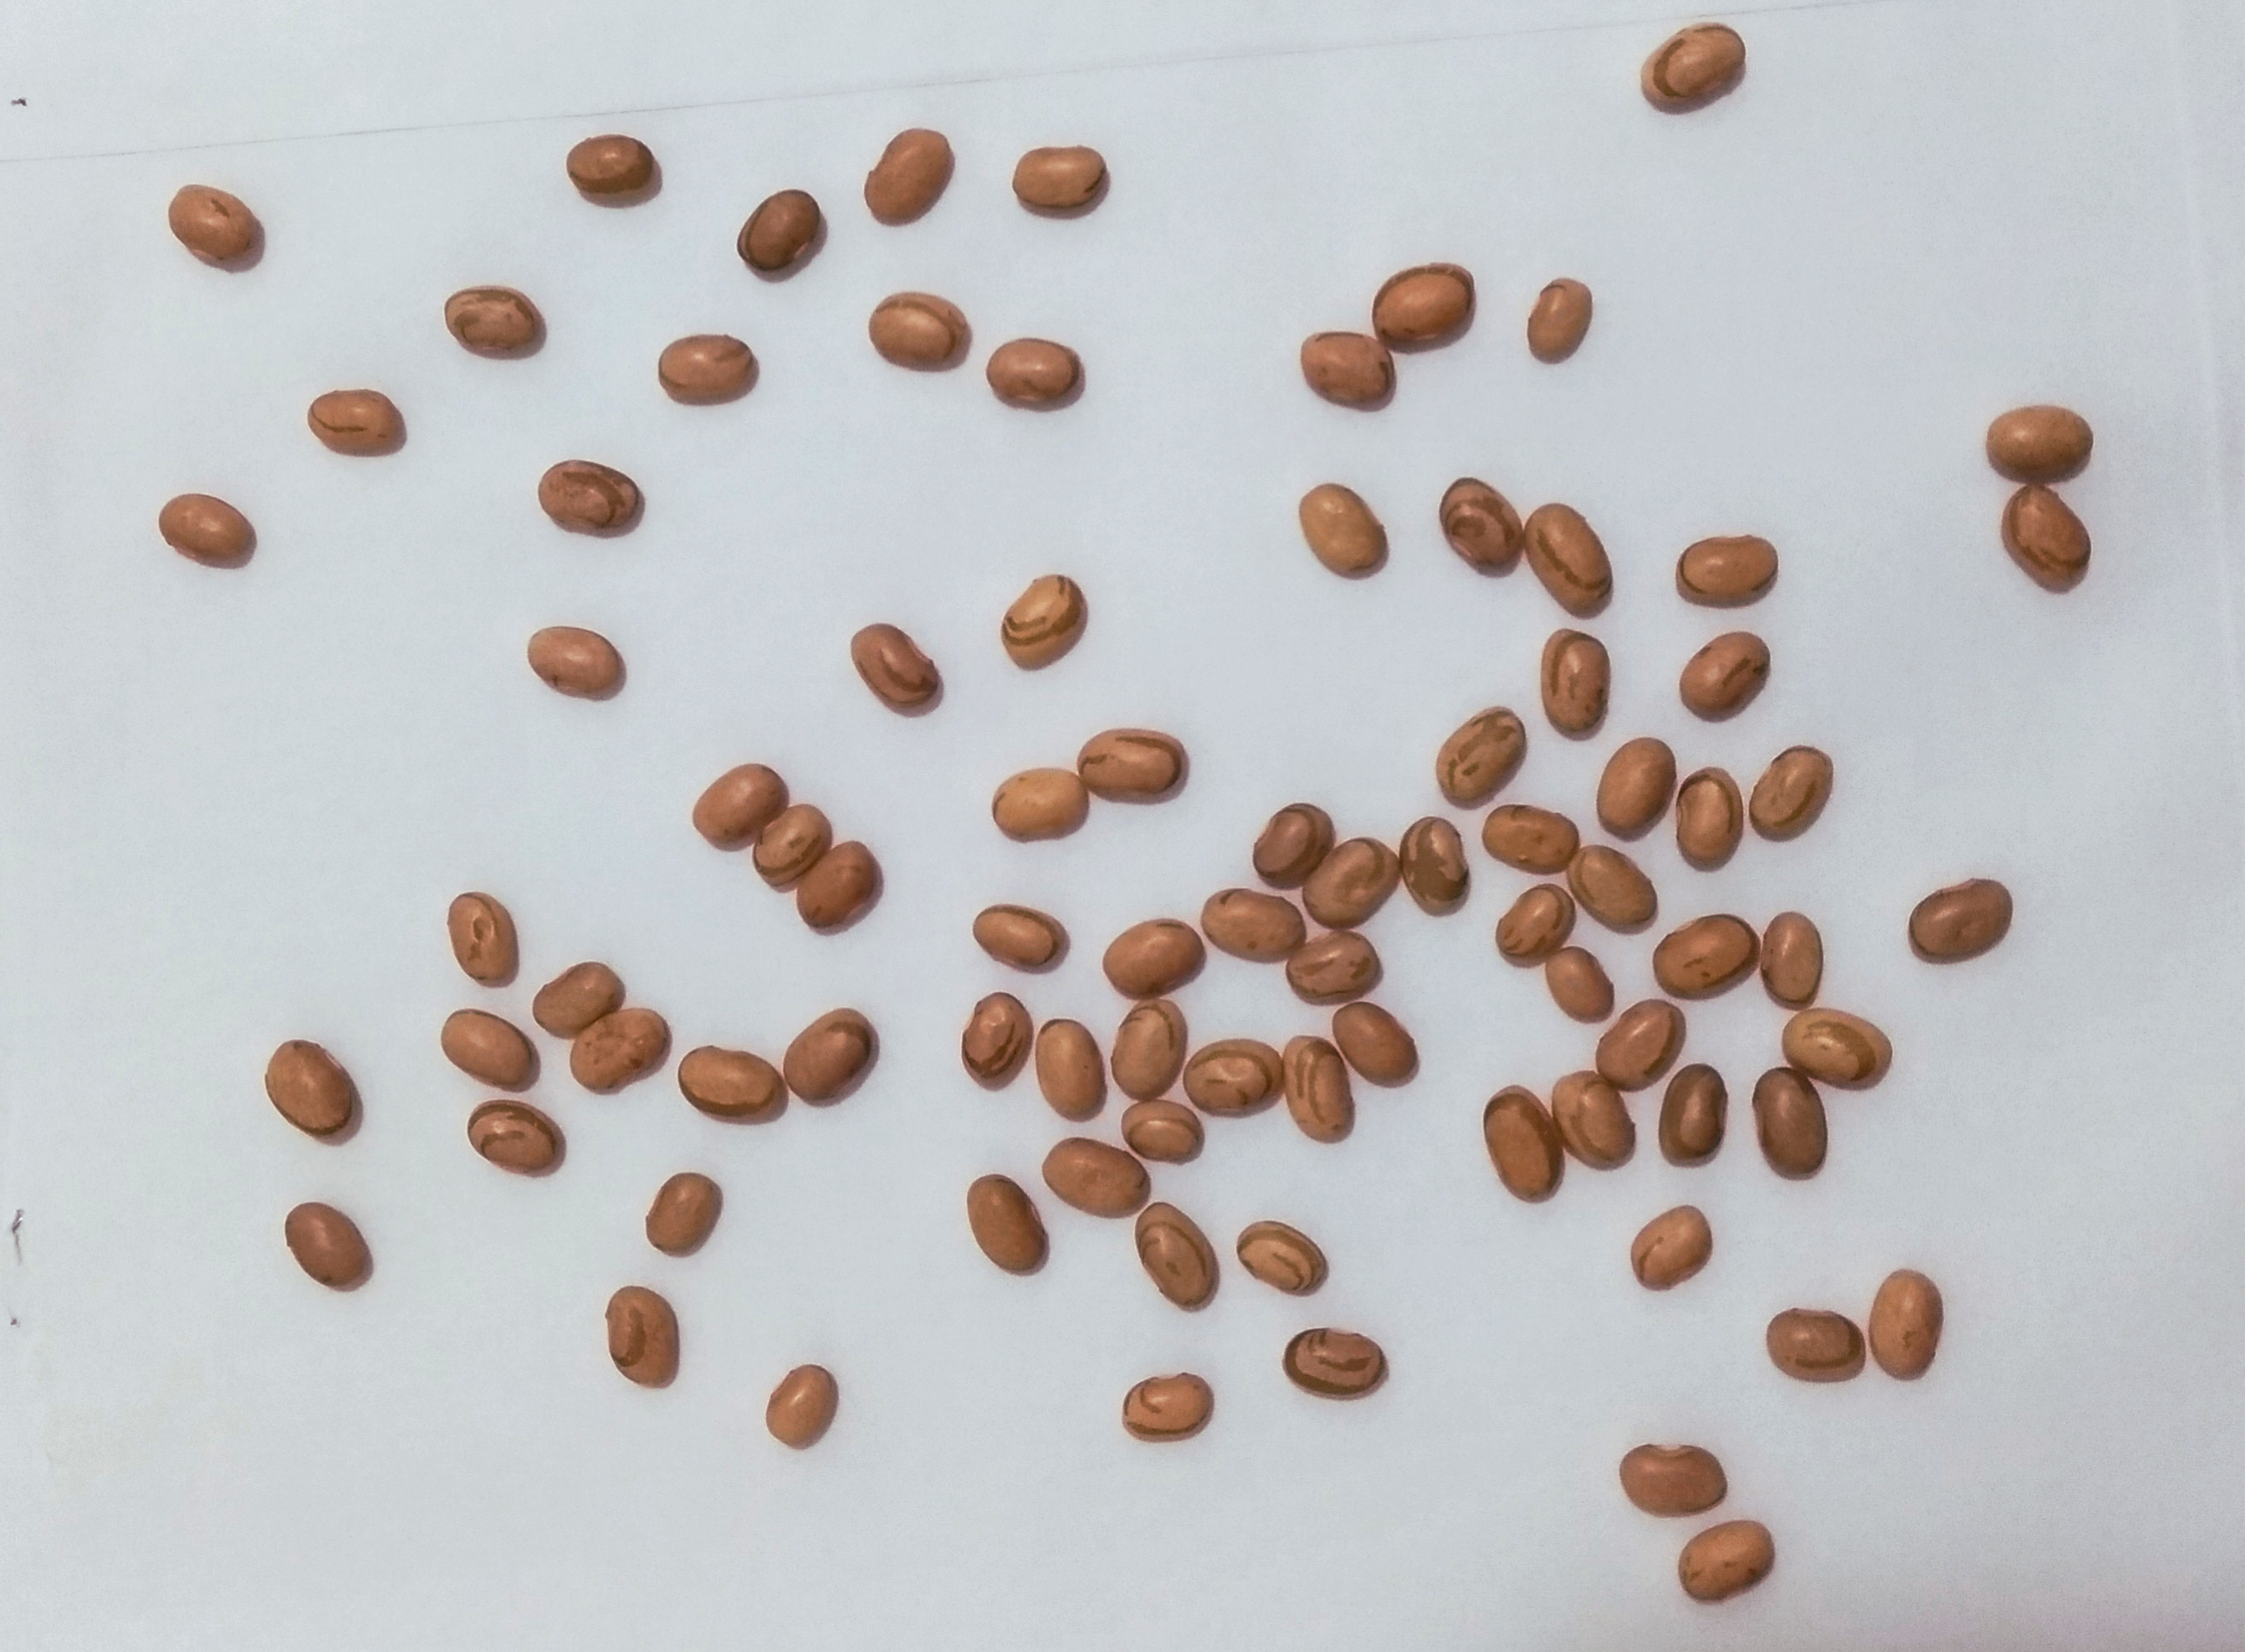

In [ ]:
image = Image.open('/content/drive/MyDrive/ColabNotebooks/Projects/CountingSeeds/beans.jpg')
arr = np.array(image)
image

In [ ]:
nseeds = np.sum(arr[...,2] < 130) / seed_size
nseeds

88.7540869226588

Result: 89. Which is within 10% of the claimed value of 85.